# importing libraries

In [14]:
# %pip install tensorflow
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
import pickle
# import tensorflow as tf

In [15]:
dframe=pd.read_csv(r"framingham.csv")

In [16]:
df=dframe.copy()
dframe.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [17]:
df.drop(["education"],axis=1,inplace=True)

In [18]:
df.rename(columns={'TenYearCHD':'target'},inplace=True)

In [19]:
print(df.shape)

(4240, 15)


In [20]:
df["target"].value_counts()

target
0    3596
1     644
Name: count, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  target           4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [22]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
target               0
dtype: int64

as data set is too big as compared to the null values so we can extract these records

In [23]:
df['BPMeds'].unique()
df['BPMeds'].value_counts()

BPMeds
0.0    4063
1.0     124
Name: count, dtype: int64

In [24]:

df['cigsPerDay'].fillna(df['cigsPerDay'].median(),inplace=True)
df['totChol'].fillna(df['totChol'].mean(),inplace=True)
df['BMI'].fillna(df['BMI'].mean(),inplace=True)
df['heartRate'].fillna(df['heartRate'].mean(),inplace=True)
df['glucose'].fillna(df['glucose'].mean(),inplace=True)


In [25]:
df.dropna(inplace=True)

In [26]:
df.shape

(4187, 15)

In [27]:
df["target"].value_counts()

target
0    3554
1     633
Name: count, dtype: int64

In [28]:
catag=[i for i in df.columns if len(df[i].unique())<4]
random=[i for i in df.columns if len(df[i].unique())>=4]

In [29]:
catag.remove("target")


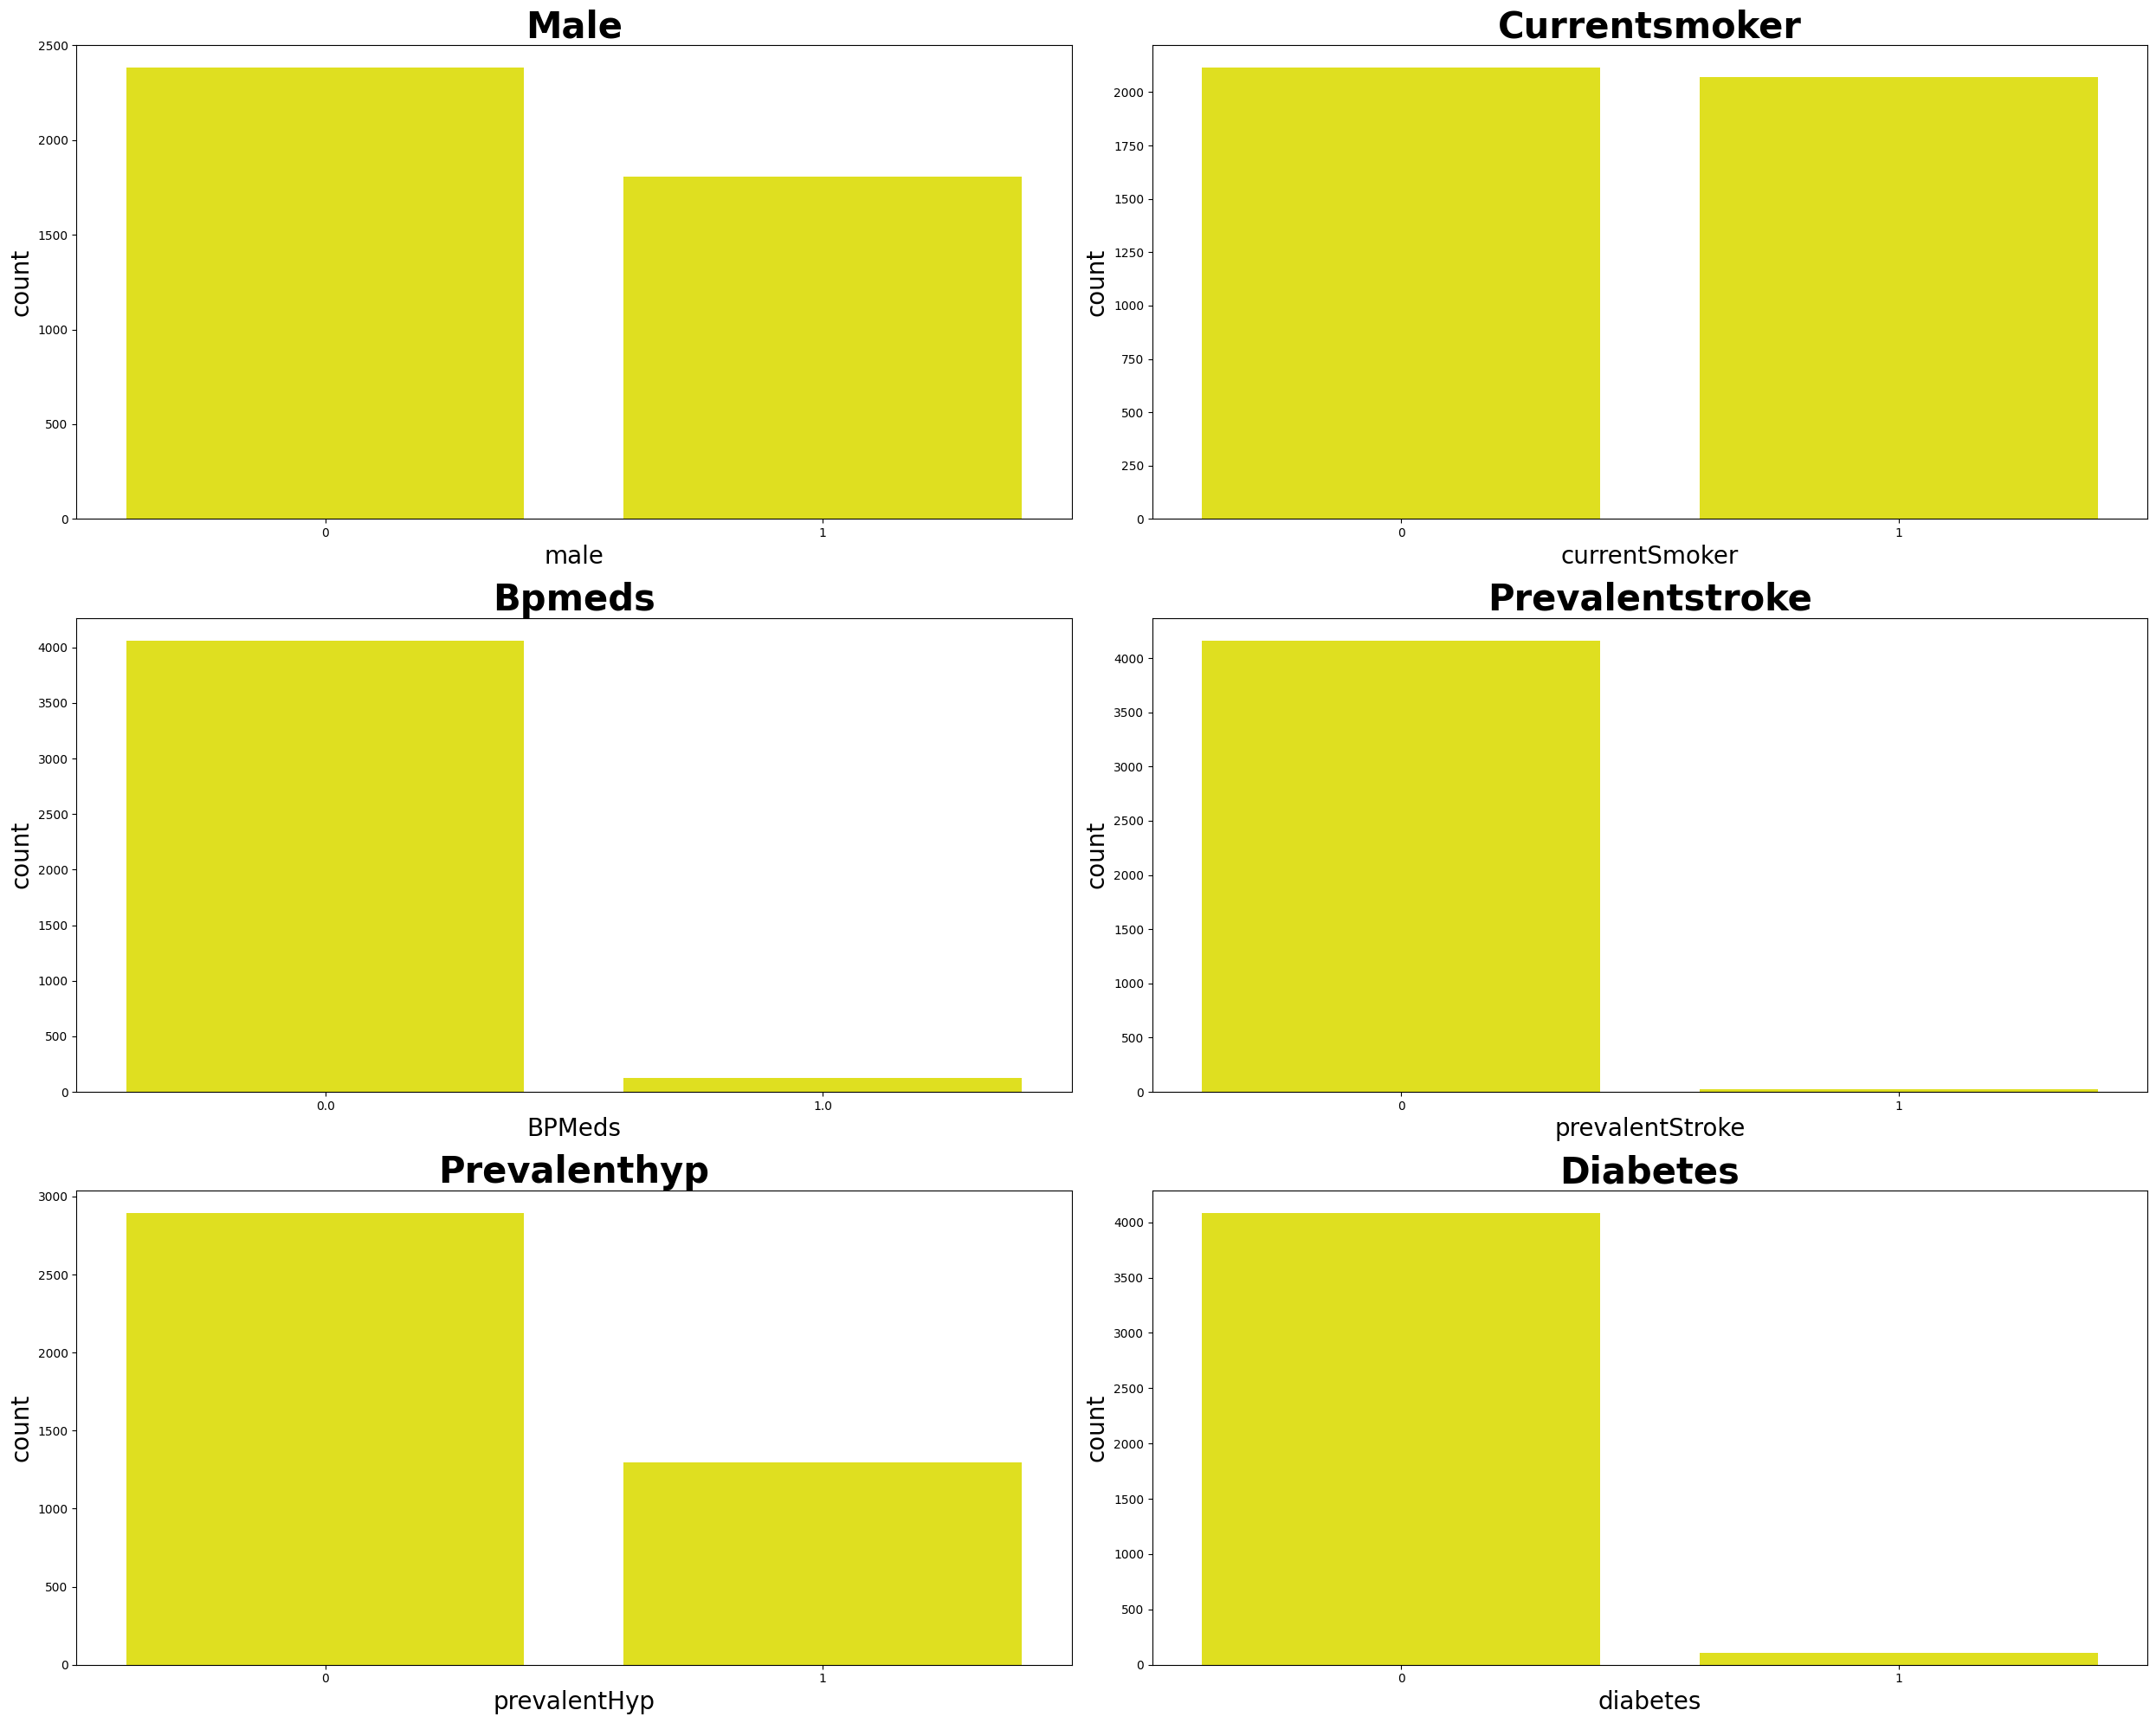

In [30]:
plt.figure(figsize=(25,20))
for n,column in enumerate(catag):
    plot=plt.subplot(3,2,n+1)
    
    plt.xlabel(column,fontsize=20)
    plt.ylabel("COUNT",fontsize=20)
    sns.countplot(x=df[column],data=df,color='yellow')
    plt.title(f'{column.title()}',weight='bold',fontsize=30)
    plt.tight_layout()

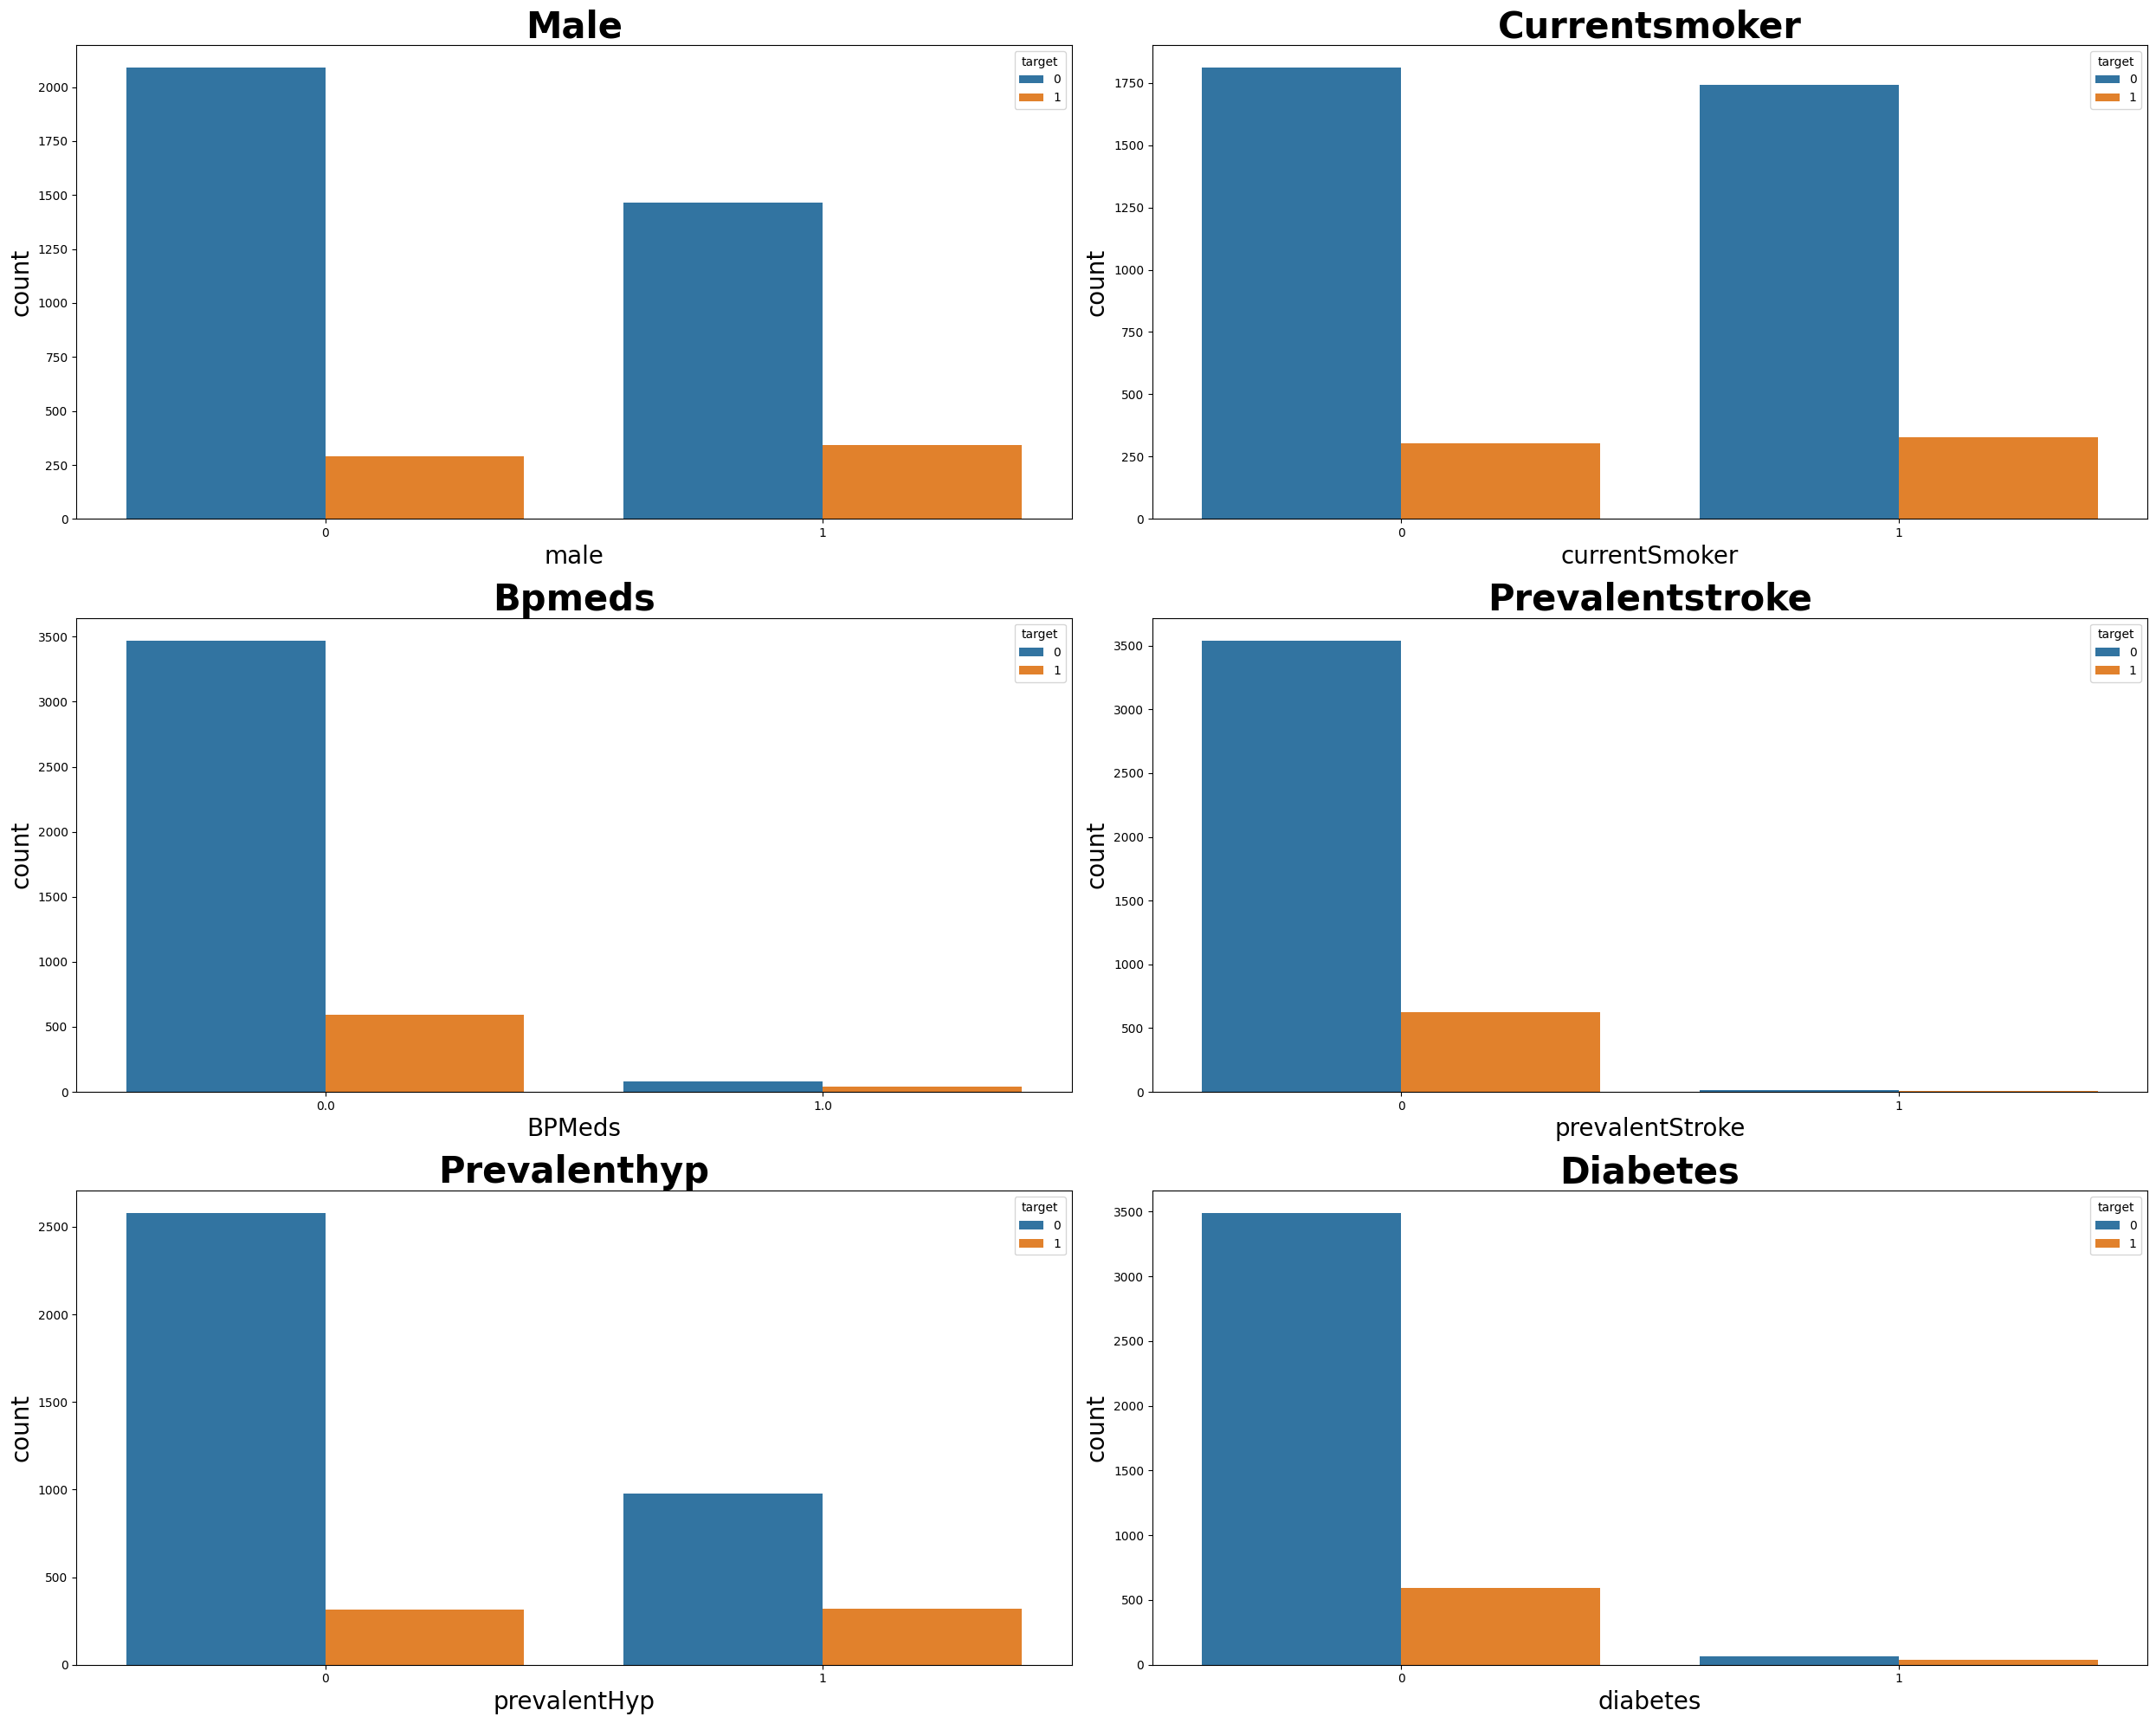

In [31]:
plt.figure(figsize=(25,20))
for n,column in enumerate(catag):
    plot=plt.subplot(3,2,n+1)
    plt.xlabel(column,fontsize=20)
    plt.ylabel("count",fontsize=20)
    sns.countplot(x=df[column],hue=df["target"],data=df)
    plt.title(f'{column.title()}',weight='bold',fontsize=30)
    plt.tight_layout()

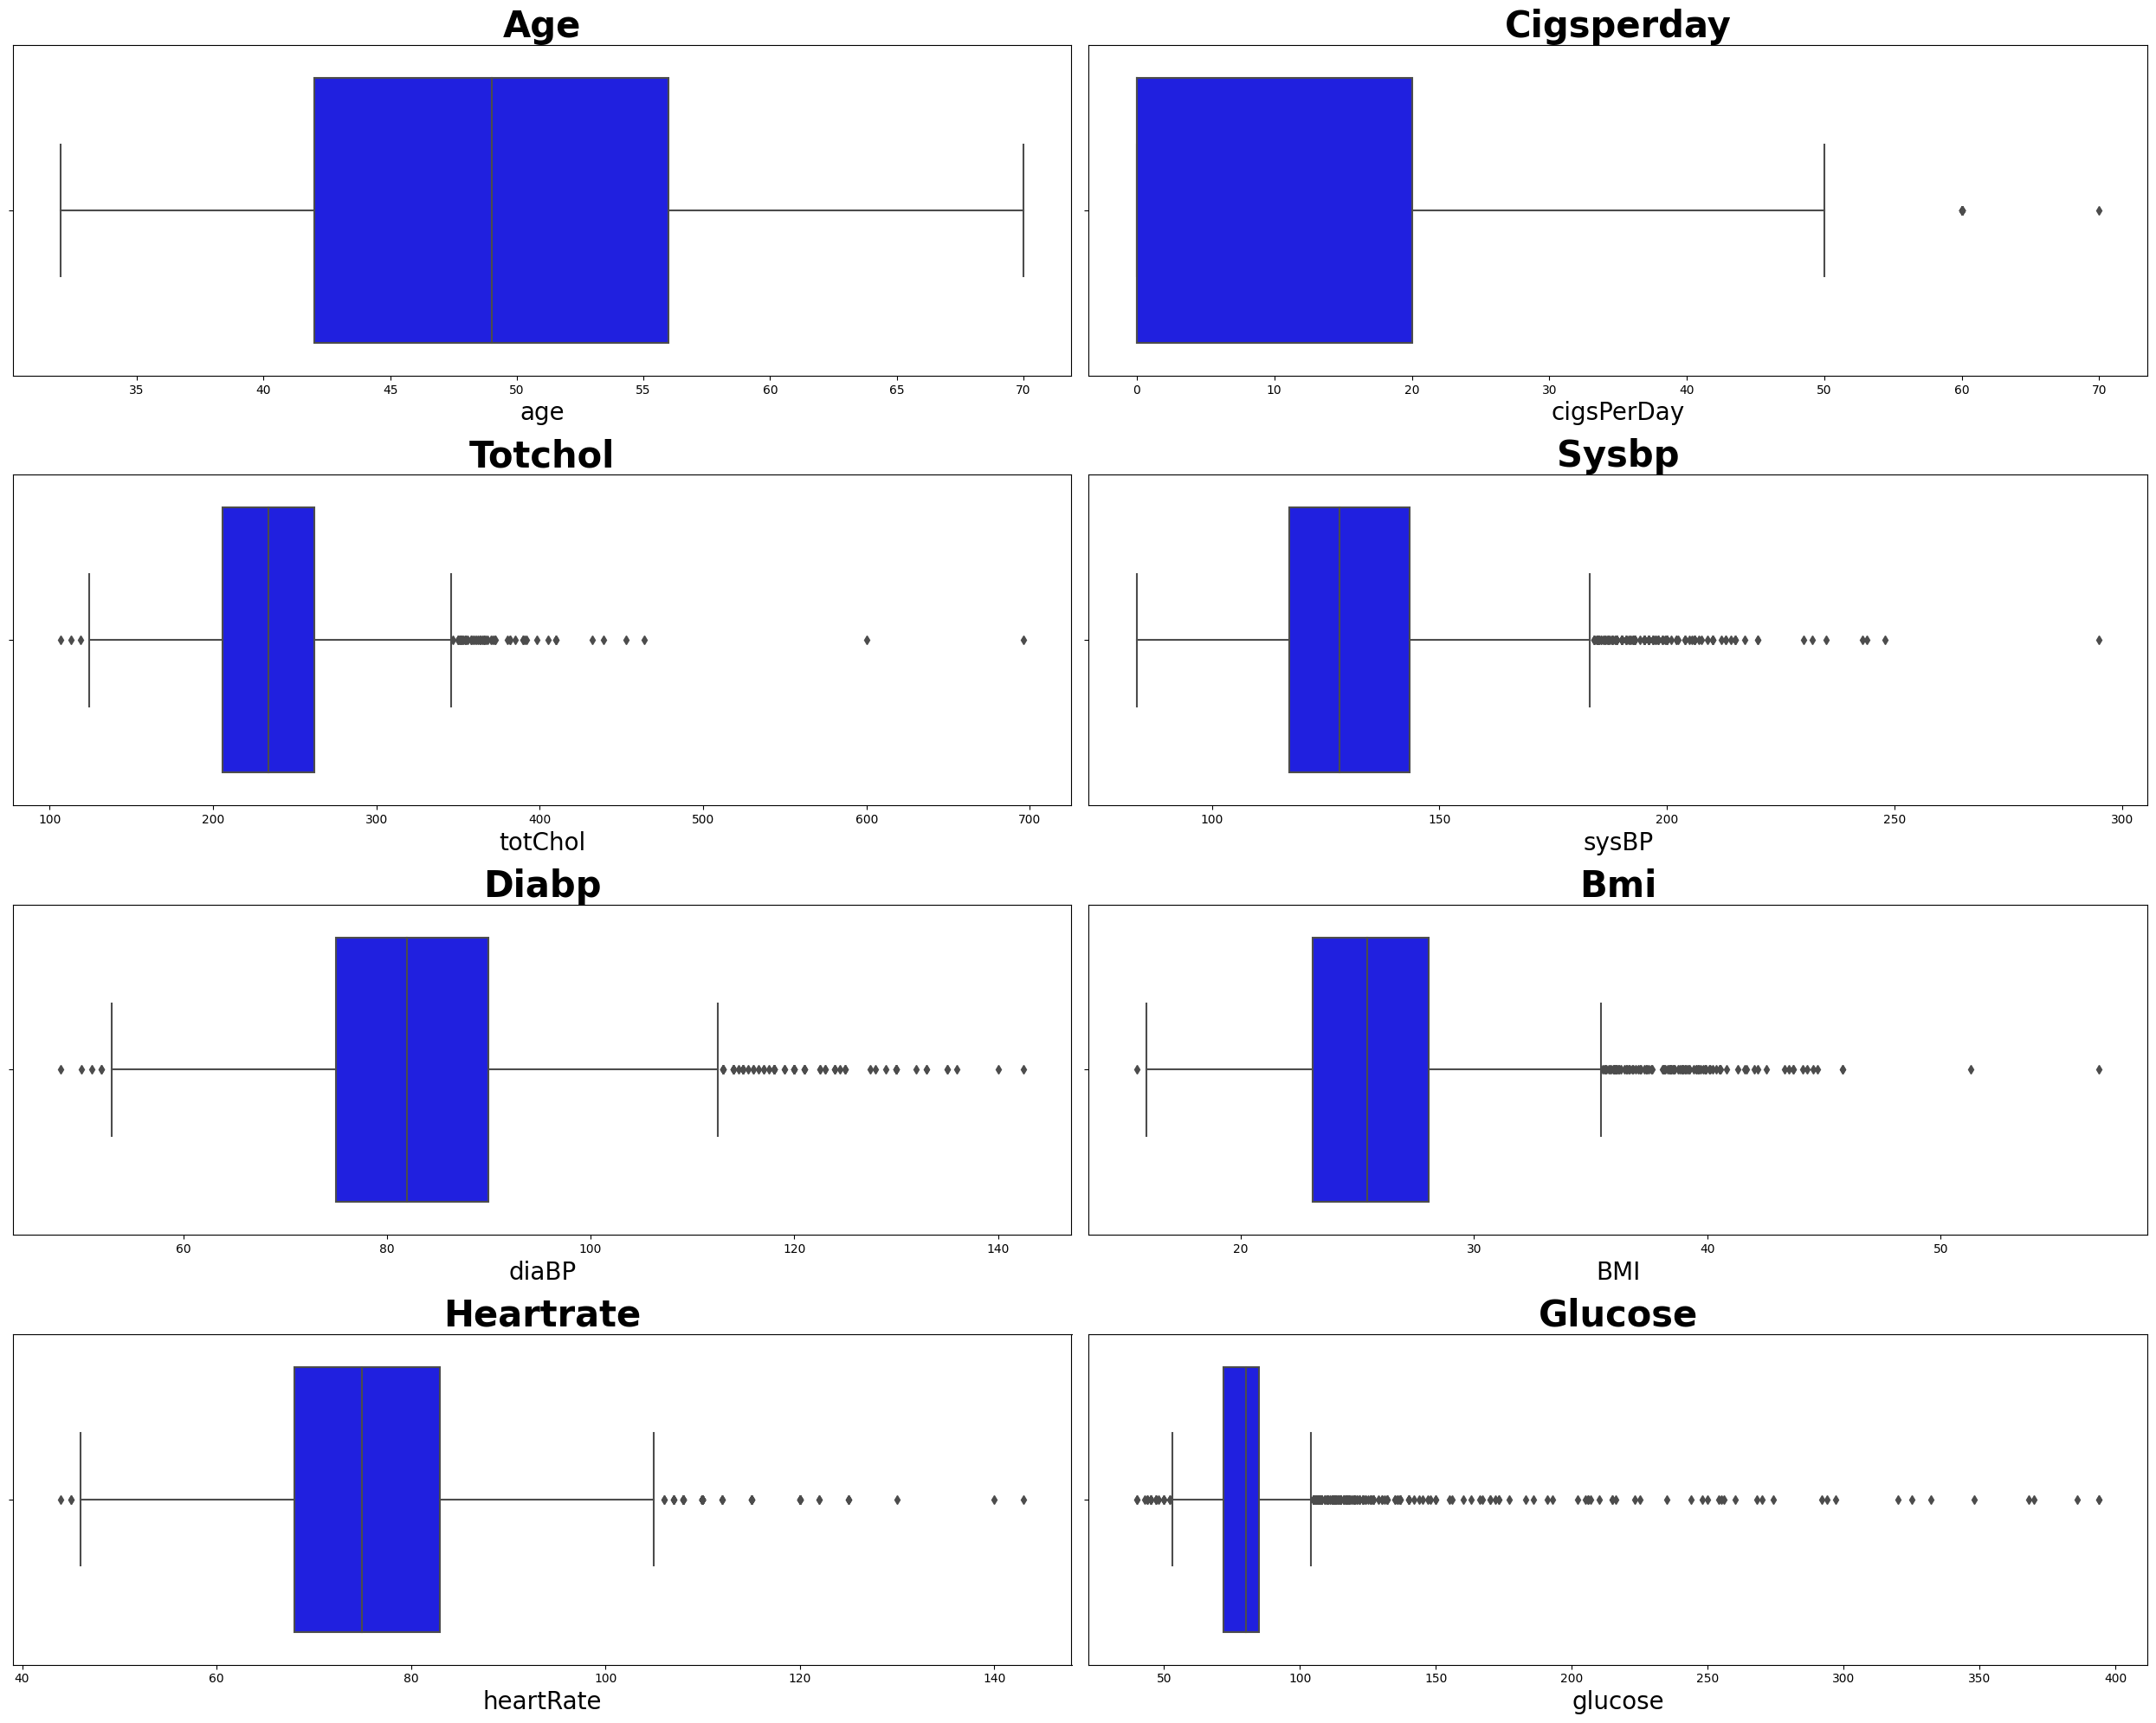

In [32]:
plt.figure(figsize=(25,20))
for n,column in enumerate(random):
    plot=plt.subplot(4,2,n+1)
    plt.xlabel(column,fontsize=20)
    sns.boxplot(x=df[column],color="blue",data=df)
    plt.title(f'{column.title()}',weight='bold',fontsize=30)
    plt.tight_layout()
plt.show()

In [33]:
x1=df.drop(["target"],axis=1)
y1=df["target"]


In [34]:
cor=df.corr()

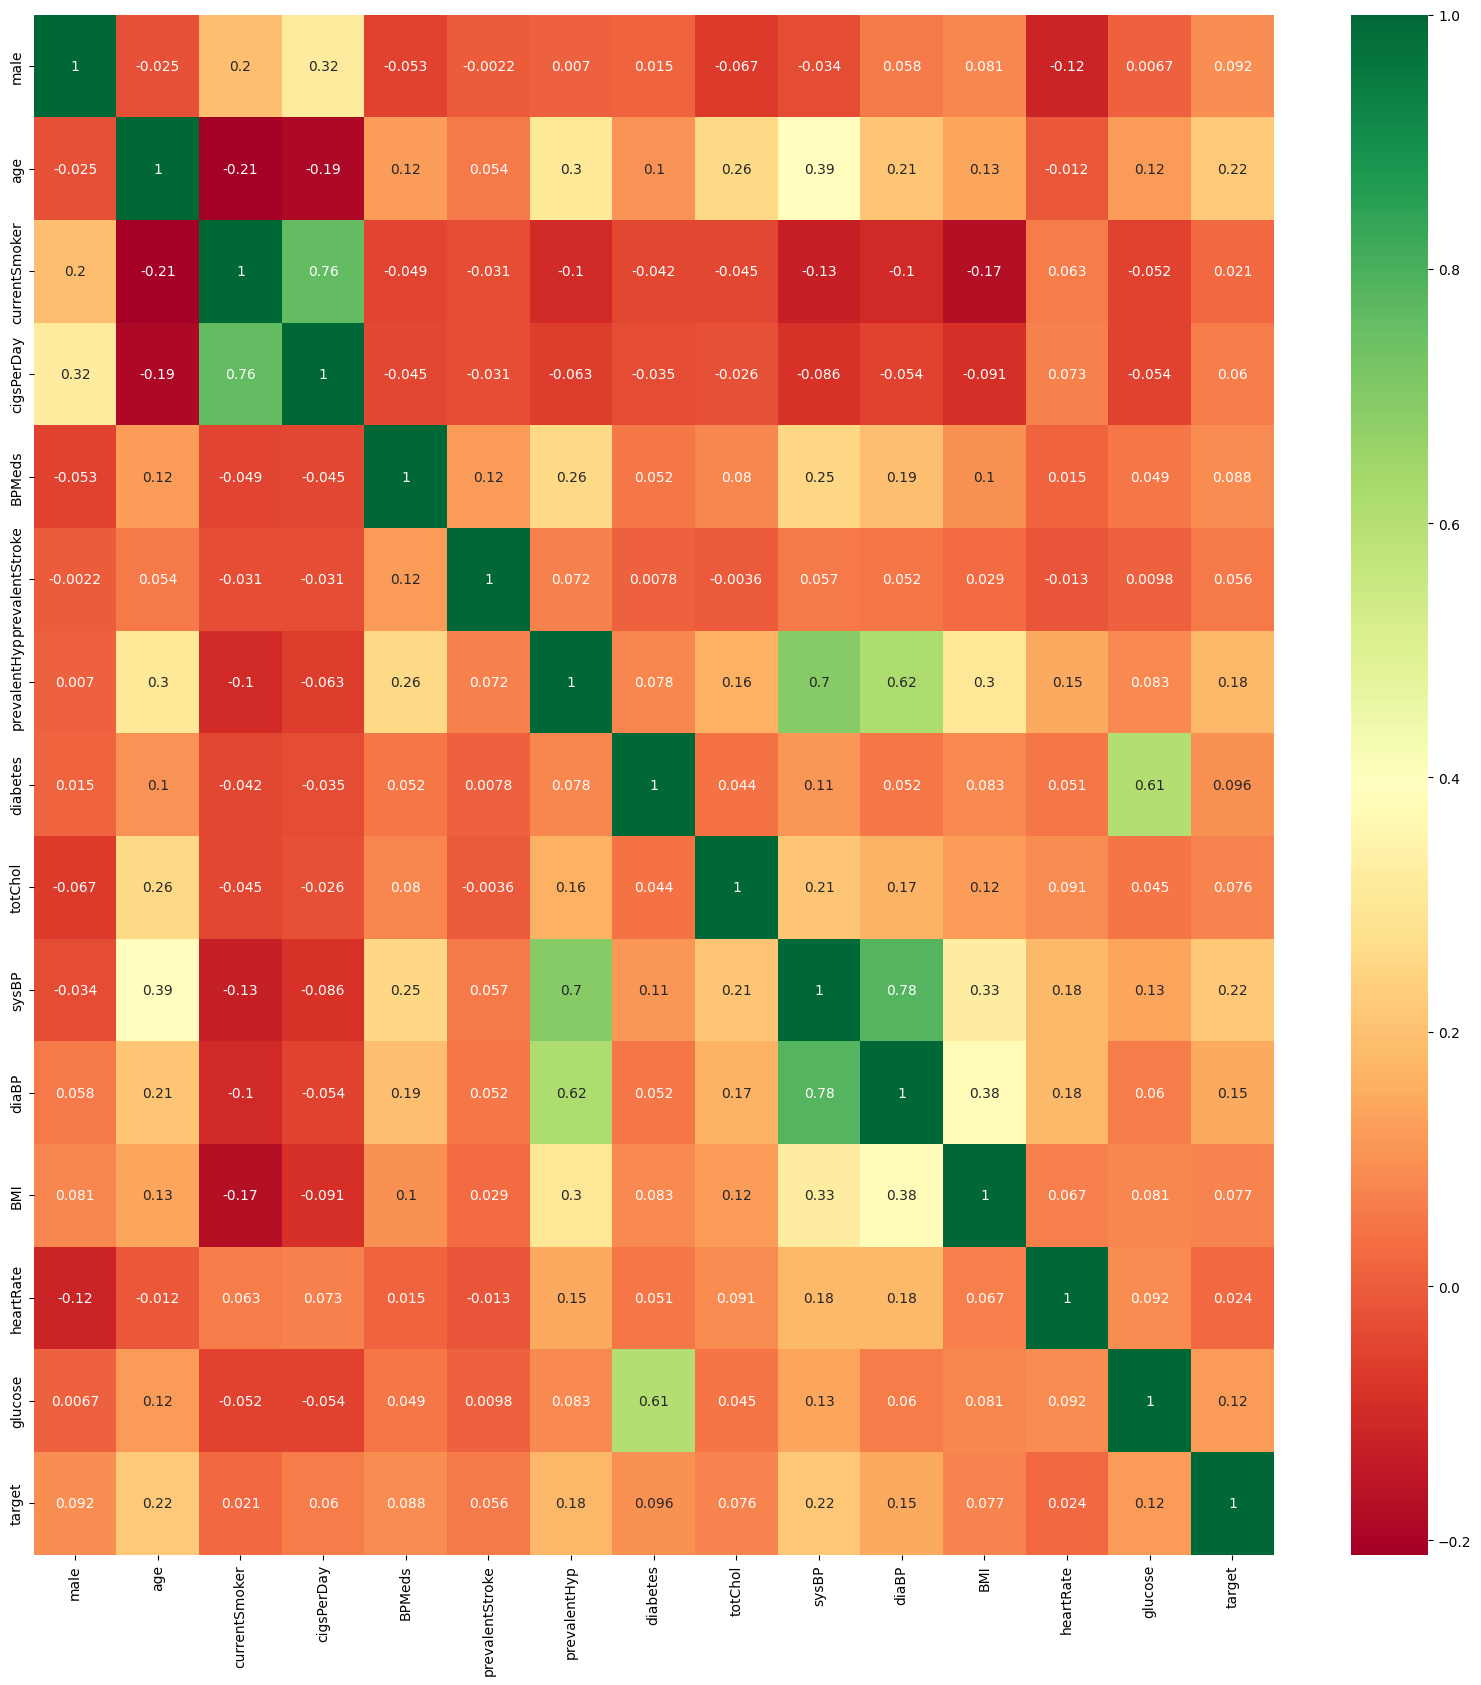

In [35]:
feature=cor.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[feature].corr(),annot=True,cmap="RdYlGn")

In [36]:
#balancing the dataset using random over sampler
import imblearn
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
x_res, y_res = oversample.fit_resample(x1, y1)

In [37]:
y_res.value_counts()

target
0    3554
1    3554
Name: count, dtype: int64

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x_res,y_res,test_size=0.2,random_state=12)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((5686, 14), (1422, 14), (5686,), (1422,))

In [39]:
ytrain=pd.DataFrame(ytrain)
ytest=pd.DataFrame(ytest)

In [40]:
#scaling the random values in between 0 and 1
standard=StandardScaler()

In [41]:
xtrain=standard.fit_transform(xtrain)
xtest=standard.transform(xtest)

In [43]:
with open('standardscaler.pkl', 'wb') as fl:
    pickle.dump(standard, fl)

# model creation

LOGISTIC REGRESSION

accuracy for test set :0.6814345991561181
accuracy for train set :0.6721772775237426
              precision    recall  f1-score   support

           0       0.64      0.71      0.67       662
           1       0.72      0.66      0.69       760

    accuracy                           0.68      1422
   macro avg       0.68      0.68      0.68      1422
weighted avg       0.68      0.68      0.68      1422


after crossvalidation accuracy is 0.67


Text(95.72222222222221, 0.5, 'pridicted')

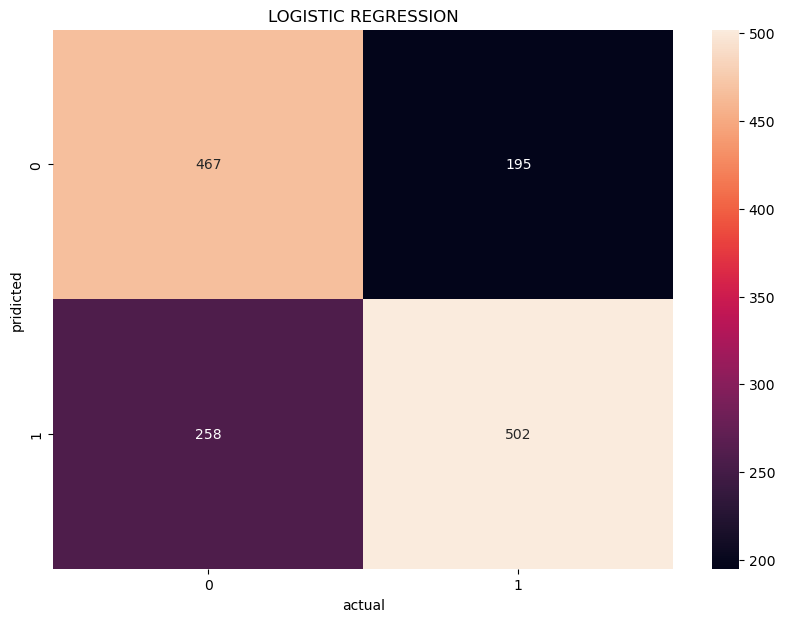

In [ ]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred_lr=lr.predict(xtest)
lr_model=accuracy_score(ypred_lr,ytest,normalize=True, sample_weight=None)
ypred_lr2=lr.predict(xtrain)
lr_model2=accuracy_score(ypred_lr2,ytrain,normalize=True, sample_weight=None)

print(f"accuracy for test set :{lr_model}\naccuracy for train set :{lr_model2}")
print(classification_report(ytest,ypred_lr))
cm = tf.math.confusion_matrix(labels=ytest,predictions=ypred_lr)

score1 = cross_val_score(lr, xtrain, ytrain, cv = 10)
print(f"\nafter crossvalidation accuracy is {round(score1.mean(),2)}")

plt.figure(figsize = (10,7)) 
plt.title("LOGISTIC REGRESSION")
sns.heatmap(cm, annot=True, fmt='d') 
plt.xlabel('actual') 
plt.ylabel('pridicted')

DECISION TREE

In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(xtrain,ytrain)
#test for test dataset
ypred_dtree=dtree.predict(xtest)
dtree_model=accuracy_score(ytest,ypred_dtree)
#test for train data
ypred_dtree2=dtree.predict(xtrain)
dtree_model2=accuracy_score(ytrain,ypred_dtree2)
print(f"accuracy for test set :{dtree_model}\naccuracy for train set :{dtree_model2}")

accuracy for test set :0.7960618846694796
accuracy for train set :1.0


In [ ]:
score2 = cross_val_score(dtree, xtrain, ytrain, cv = 12)
print(f"after crossvalidation accuracy is {round(score2.mean(),2)}")

after crossvalidation accuracy is 0.9


              precision    recall  f1-score   support

           0       0.84      0.85      0.84       662
           1       0.87      0.86      0.86       760

    accuracy                           0.86      1422
   macro avg       0.85      0.85      0.85      1422
weighted avg       0.86      0.86      0.86      1422



Text(95.72222222222221, 0.5, 'pridicted')

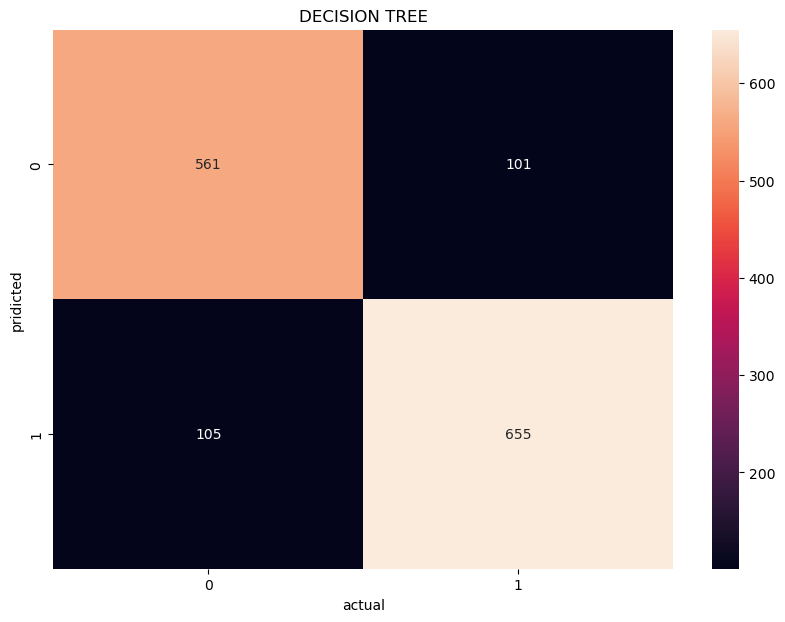

In [ ]:
print(classification_report(ytest,ypred_dtree))
cm = tf.math.confusion_matrix(labels=ytest,predictions=ypred_dtree)

plt.figure(figsize = (10,7)) 
plt.title("DECISION TREE")
sns.heatmap(cm, annot=True, fmt='d') 
plt.xlabel('actual') 
plt.ylabel('pridicted')

RANDOM FOREST

In [ ]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain.values.ravel())
ypred_rf=rf.predict(xtest)
rf_model=accuracy_score(ypred_rf,ytest)
ypred_rf2=rf.predict(xtrain)
rf_model2=accuracy_score(ypred_rf2,ytrain)
print(f"accuracy for test set :{rf_model:.2f}\naccuracy for train set :{rf_model2:.2f}")

score3 = cross_val_score(rf, xtrain, ytrain, cv = 12)
print(f"\nafter cross validation the accuracy is {round(score3.mean(),2)}")

accuracy for test set :0.97
accuracy for train set :1.00

after cross validation the accuracy is 0.96


              precision    recall  f1-score   support

           0       1.00      0.95      0.97       662
           1       0.96      1.00      0.98       760

    accuracy                           0.97      1422
   macro avg       0.98      0.97      0.97      1422
weighted avg       0.98      0.97      0.97      1422



Text(95.72222222222221, 0.5, 'pridicted')

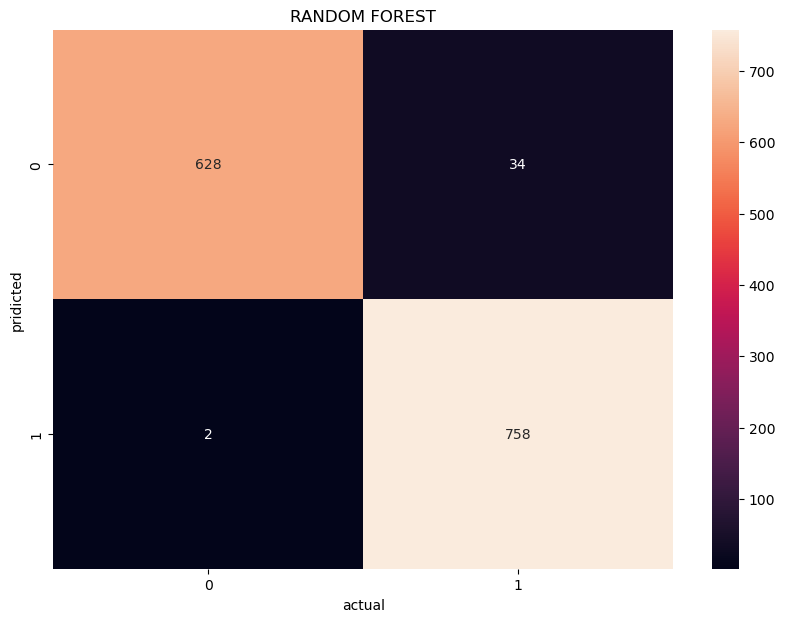

In [ ]:
print(classification_report(ytest,ypred_rf))
cm = tf.math.confusion_matrix(labels=ytest,predictions=ypred_rf)

plt.figure(figsize = (10,7)) 
plt.title("RANDOM FOREST")
sns.heatmap(cm, annot=True, fmt='d') 
plt.xlabel('actual') 
plt.ylabel('pridicted')

KNN

In [ ]:
l=[]
for k in range(1,40):
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(xtrain,ytrain)
    l.append(classifier.score(xtest,ytest))
k=np.argmax(l)+1
print(f"k ={k}")

k =1


In [ ]:
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(xtrain,ytrain)
ypred_knn2=knn.predict(xtrain)
p=accuracy_score(ypred_knn2,ytrain)

ypred_knn=knn.predict(xtest)
q=accuracy_score(ypred_knn,ytest)
print(f"accuracy for test set :{q}\naccuracy for train set :{p}")

accuracy for test set :0.9360056258790436
accuracy for train set :1.0


In [ ]:
score4 = cross_val_score(knn, xtrain, ytrain, cv = 10)
score4.mean()

0.9196214634025596

              precision    recall  f1-score   support

           0       0.99      0.87      0.93       662
           1       0.90      0.99      0.94       760

    accuracy                           0.94      1422
   macro avg       0.94      0.93      0.93      1422
weighted avg       0.94      0.94      0.94      1422



Text(95.72222222222221, 0.5, 'pridicted')

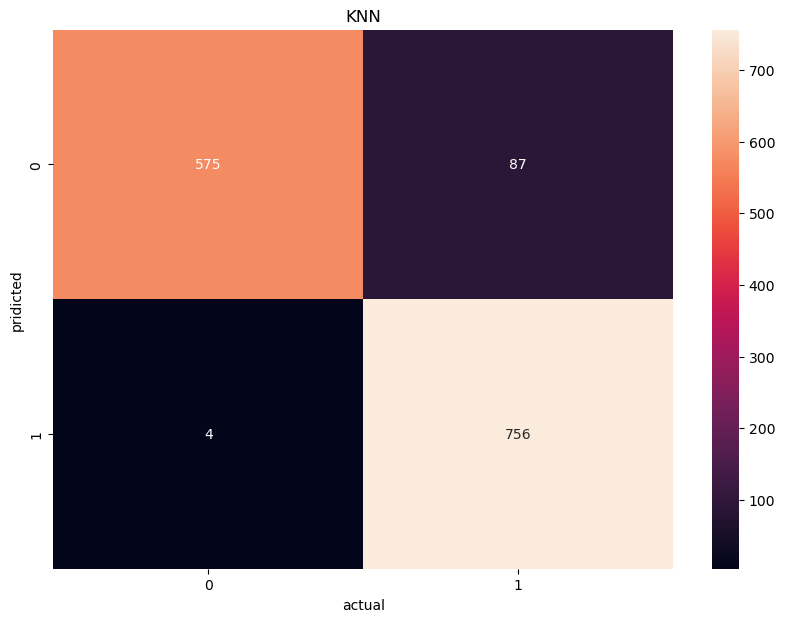

In [ ]:
print(classification_report(ytest,ypred_knn))
cm = tf.math.confusion_matrix(labels=ytest,predictions=ypred_knn)

plt.figure(figsize = (10,7)) 
sns.heatmap(cm, annot=True, fmt='d')
plt.title("KNN")
plt.xlabel('actual') 
plt.ylabel('pridicted')

ANN

In [42]:
# from tensorflow import keras 
# from tensorflow.keras import Sequential

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# model = keras.Sequential([
#     keras.layers.Dense(14, input_shape=(14,), activation='relu'),
#     keras.layers.Dense(14, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])
# model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# model.fit(xtrain, ytrain, epochs=80)

Epoch 1/80
178/178 [==============================] - 1s 974us/step - loss: 0.6820 - accuracy: 0.5707
Epoch 2/80
178/178 [==============================] - 0s 868us/step - loss: 0.6187 - accuracy: 0.6597
Epoch 3/80
178/178 [==============================] - 0s 855us/step - loss: 0.6046 - accuracy: 0.6790
Epoch 4/80
178/178 [==============================] - 0s 858us/step - loss: 0.5973 - accuracy: 0.6845
Epoch 5/80
178/178 [==============================] - 0s 854us/step - loss: 0.5915 - accuracy: 0.6933
Epoch 6/80
178/178 [==============================] - 0s 846us/step - loss: 0.5877 - accuracy: 0.6899
Epoch 7/80
178/178 [==============================] - 0s 838us/step - loss: 0.5839 - accuracy: 0.6952
Epoch 8/80
178/178 [==============================] - 0s 835us/step - loss: 0.5814 - accuracy: 0.6977
Epoch 9/80
178/178 [==============================] - 0s 858us/step - loss: 0.5795 - accuracy: 0.7033
Epoch 10/80
178/178 [==============================] - 0s 833us/step - loss: 0.577

In [ ]:
# model.evaluate(xtest,ytest)

45/45 [==============================] - 0s 768us/step - loss: 0.5395 - accuracy: 0.7328


[0.5394806861877441, 0.7327707409858704]

In [ ]:
# yp = model.predict(xtest)
# #as sigmoid function only provide the probabilities ,we have to convert it into the response i.e 1 or 0
# ypred_ANN=[]
# for i in yp:
#     if i>=0.5:
#         ypred_ANN.append(1)
#     else:
#         ypred_ANN.append(0)
# p=accuracy_score(ypred_ANN,ytest)
# print(f"accuracy for test set :{p:.2f}")


45/45 [==============================] - 0s 626us/step
accuracy for test set :0.73


              precision    recall  f1-score   support

           0       0.70      0.74      0.72       662
           1       0.76      0.73      0.74       760

    accuracy                           0.73      1422
   macro avg       0.73      0.73      0.73      1422
weighted avg       0.73      0.73      0.73      1422



Text(95.72222222222221, 0.5, 'predicted')

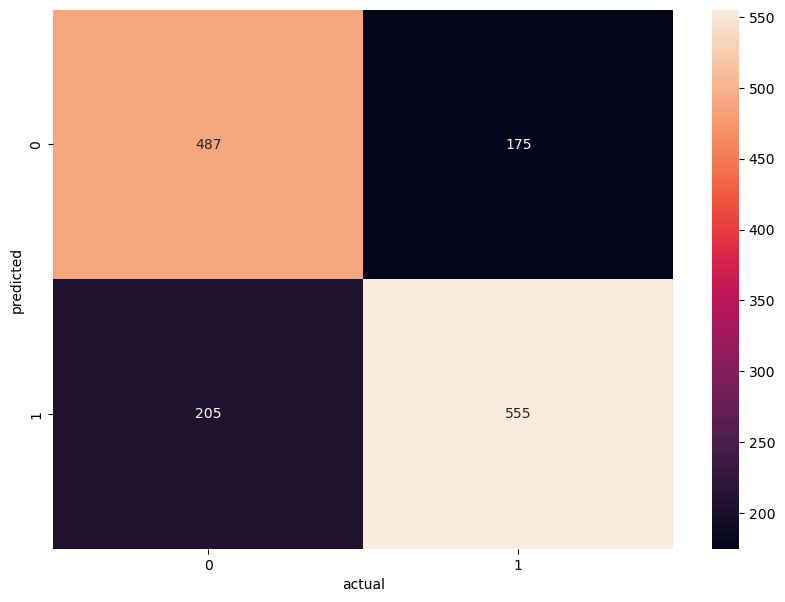

In [ ]:
# print(classification_report(ytest,ypred_ANN))
# cm = tf.math.confusion_matrix(labels=ytest,predictions=ypred_ANN)

# plt.figure(figsize = (10,7)) 
# sns.heatmap(cm, annot=True, fmt='d') 
# plt.xlabel('actual') 
# plt.ylabel('predicted')

In [ ]:
from sklearn import svm
SVM = svm.SVC(kernel='rbf',
    degree=3,
    gamma='scale')

In [ ]:
SVM.fit(xtrain, ytrain)
ypred_svm=SVM.predict(xtest)

In [ ]:
print(accuracy_score(ytest,ypred_svm))
score5 = cross_val_score(SVM, xtrain, ytrain, cv = 12)
print(f"\nafter cross validation the accuracy is {round(score5.mean(),2)}")

0.7025316455696202

after cross validation the accuracy is 0.71


              precision    recall  f1-score   support

           0       0.67      0.72      0.69       662
           1       0.74      0.68      0.71       760

    accuracy                           0.70      1422
   macro avg       0.70      0.70      0.70      1422
weighted avg       0.71      0.70      0.70      1422



Text(95.72222222222221, 0.5, 'predicted')

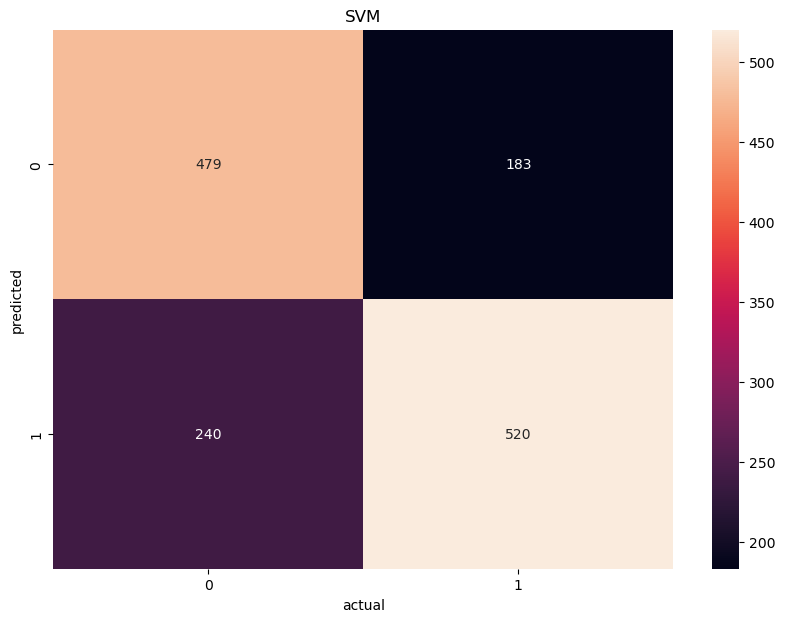

In [ ]:
print(classification_report(ytest,ypred_svm))
cm = tf.math.confusion_matrix(labels=ytest,predictions=ypred_svm)

plt.figure(figsize = (10,7)) 
plt.title("SVM")
sns.heatmap(cm, annot=True, fmt='d') 
plt.xlabel('actual') 
plt.ylabel('predicted')

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
ypred_nb=nb.predict(xtest)
model_nb=accuracy_score(ypred_nb,ytest)

In [ ]:
model_nb

0.5773558368495078

# Best model

In [ ]:
with open('RandomForest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)